# Task 1

***

## Web scraping and analysis

In [113]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [114]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 80

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div",{"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 80 total reviews
Scraping page 2
   ---> 160 total reviews
Scraping page 3
   ---> 240 total reviews
Scraping page 4
   ---> 320 total reviews
Scraping page 5
   ---> 400 total reviews
Scraping page 6
   ---> 480 total reviews
Scraping page 7
   ---> 560 total reviews
Scraping page 8
   ---> 640 total reviews
Scraping page 9
   ---> 720 total reviews
Scraping page 10
   ---> 800 total reviews


In [115]:
df = pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,✅ Trip Verified | Starting off at Heathrow Te...
1,Not Verified | We have flown this route with ...
2,✅ Trip Verified | A last minute business trip ...
3,✅ Trip Verified | Overall I would say disapp...
4,Not Verified | LHR to Delhi in Business. Exce...
...,...
795,✅ Trip Verified | London to Belfast. Check in ...
796,Not Verified | London Gatwick to Salzburg wit...
797,✅ Trip Verified | Frankfurt to London. Flight...
798,✅ Trip Verified | Hyderabad to San Francisco ...


***

## Data Cleaning

In [116]:
df.reviews= df.reviews.str.split('|',expand=True)[1]
df

,reviews
0,Starting off at Heathrow Terminal 3. Check i...
1,We have flown this route with EasyJet regula...
2,"A last minute business trip to HND, a route I..."
3,Overall I would say disappointing. Due to B...
4,LHR to Delhi in Business. Exceptional flight...
...,...
795,London to Belfast. Check in was fast and effi...
796,London Gatwick to Salzburg with British Airw...
797,Frankfurt to London. Flight attendants very ...
798,Hyderabad to San Francisco via London. I had...


In [117]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()


,reviews,Cleaned Reviews
0,Starting off at Heathrow Terminal 3. Check i...,Starting off at Heathrow Terminal Check in wa...
1,We have flown this route with EasyJet regula...,We have flown this route with EasyJet regular...
2,"A last minute business trip to HND, a route I...",A last minute business trip to HND a route I ...
3,Overall I would say disappointing. Due to B...,Overall I would say disappointing Due to BA s...
4,LHR to Delhi in Business. Exceptional flight...,LHR to Delhi in Business Exceptional flight S...


### Remove punctuation

In [118]:
import string

def remove_punctuation(text):
    for punctuation in string.punctuation:
        text= text.replace(punctuation,'')
    return text

df['Cleaned Reviews'] = remove_punctuation(df['Cleaned Reviews'])
df

,reviews,Cleaned Reviews
0,Starting off at Heathrow Terminal 3. Check i...,Starting off at Heathrow Terminal Check in wa...
1,We have flown this route with EasyJet regula...,We have flown this route with EasyJet regular...
2,"A last minute business trip to HND, a route I...",A last minute business trip to HND a route I ...
3,Overall I would say disappointing. Due to B...,Overall I would say disappointing Due to BA s...
4,LHR to Delhi in Business. Exceptional flight...,LHR to Delhi in Business Exceptional flight S...
...,...,...
795,London to Belfast. Check in was fast and effi...,London to Belfast Check in was fast and effic...
796,London Gatwick to Salzburg with British Airw...,London Gatwick to Salzburg with British Airwa...
797,Frankfurt to London. Flight attendants very ...,Frankfurt to London Flight attendants very ki...
798,Hyderabad to San Francisco via London. I had...,Hyderabad to San Francisco via London I had a...


### Lower case

In [119]:
# Convertir les caractères en minuscules dans la colonne 'Cleaned Reviews'
df['Cleaned Reviews'] = df['Cleaned Reviews'].str.lower()
df

,reviews,Cleaned Reviews
0,Starting off at Heathrow Terminal 3. Check i...,starting off at heathrow terminal check in wa...
1,We have flown this route with EasyJet regula...,we have flown this route with easyjet regular...
2,"A last minute business trip to HND, a route I...",a last minute business trip to hnd a route i ...
3,Overall I would say disappointing. Due to B...,overall i would say disappointing due to ba s...
4,LHR to Delhi in Business. Exceptional flight...,lhr to delhi in business exceptional flight s...
...,...,...
795,London to Belfast. Check in was fast and effi...,london to belfast check in was fast and effic...
796,London Gatwick to Salzburg with British Airw...,london gatwick to salzburg with british airwa...
797,Frankfurt to London. Flight attendants very ...,frankfurt to london flight attendants very ki...
798,Hyderabad to San Francisco via London. I had...,hyderabad to san francisco via london i had a...


### Stop words

In [120]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\minht\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [121]:
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [122]:
def remove_stopwords(text: str) -> str:

    # convert the filtered list back to a string
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['Cleaned Reviews'] = df['Cleaned Reviews'].apply(remove_stopwords)
df.head()

,reviews,Cleaned Reviews
0,Starting off at Heathrow Terminal 3. Check i...,starting heathrow terminal check fairly easy f...
1,We have flown this route with EasyJet regula...,flown route easyjet regularly twenty years age...
2,"A last minute business trip to HND, a route I...",last minute business trip hnd route regularly ...
3,Overall I would say disappointing. Due to B...,overall would say disappointing due ba status ...
4,LHR to Delhi in Business. Exceptional flight...,lhr delhi business exceptional flight stylish ...


### Stemming VS Lemmatization

Stemming is faster and less precise because it simply truncates words, while lemmatization is more precise but slower because it takes into account the linguistic structure of the word. The choice between stemming and lemmatization depends on the specific needs of the project and the intended application.

### Lemmatization

Lemmatization aims to bring words back to their canonical form or to their lemma, that is to say their basic form or dictionary.
Unlike stemming, lemmatisation takes into account the morphology of the word and its grammatical context to produce a valid and recognized form.
Lemmatization often requires more complex analysis and linguistic resources such as dictionaries or grammatical rules.
The results of lemmatization are usually real and understandable words.

In [123]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download the necessary resources for NLTK if you haven't already done so
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)  # Word tokenization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Application of lemmatization to each word
    return " ".join(lemmatized_tokens)  

# Apply the lemmatize_text function to the 'Cleaned Reviews' column
df['Cleaned Reviews'] = df['Cleaned Reviews'].apply(lemmatize_text)
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\minht\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\minht\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,reviews,Cleaned Reviews
0,Starting off at Heathrow Terminal 3. Check i...,starting heathrow terminal check fairly easy f...
1,We have flown this route with EasyJet regula...,flown route easyjet regularly twenty year age ...
2,"A last minute business trip to HND, a route I...",last minute business trip hnd route regularly ...
3,Overall I would say disappointing. Due to B...,overall would say disappointing due ba status ...
4,LHR to Delhi in Business. Exceptional flight...,lhr delhi business exceptional flight stylish ...
...,...,...
795,London to Belfast. Check in was fast and effi...,london belfast check fast efficient using ba t...
796,London Gatwick to Salzburg with British Airw...,london gatwick salzburg british airway worst c...
797,Frankfurt to London. Flight attendants very ...,frankfurt london flight attendant kind flying ...
798,Hyderabad to San Francisco via London. I had...,hyderabad san francisco via london awesome exp...


***

## Sentiment Analysis using VADER

VADER ("Valence Aware Dictionary and sEntiment Reasoner"), is a sentiment analysis tool integrated in NLTK (Natural Language Toolkit) for Python. It is widely used to evaluate the sentiment of texts, especially in social media and online comments.

In [124]:
!pip install vaderSentiment

In [125]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize the Vader Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Set a function to get the sentiment score for each text
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

df['Sentiment Score'] = df['Cleaned Reviews'].apply(get_sentiment_score)
df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\minht\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,reviews,Cleaned Reviews,Sentiment Score
0,Starting off at Heathrow Terminal 3. Check i...,starting heathrow terminal check fairly easy f...,0.9971
1,We have flown this route with EasyJet regula...,flown route easyjet regularly twenty year age ...,0.7717
2,"A last minute business trip to HND, a route I...",last minute business trip hnd route regularly ...,0.9775
3,Overall I would say disappointing. Due to B...,overall would say disappointing due ba status ...,-0.7441
4,LHR to Delhi in Business. Exceptional flight...,lhr delhi business exceptional flight stylish ...,0.9788
...,...,...,...
795,London to Belfast. Check in was fast and effi...,london belfast check fast efficient using ba t...,0.9755
796,London Gatwick to Salzburg with British Airw...,london gatwick salzburg british airway worst c...,-0.8658
797,Frankfurt to London. Flight attendants very ...,frankfurt london flight attendant kind flying ...,0.7269
798,Hyderabad to San Francisco via London. I had...,hyderabad san francisco via london awesome exp...,0.8910


In [126]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment Score'].apply(vader_analysis)
df

,reviews,Cleaned Reviews,Sentiment Score,Analysis
0,Starting off at Heathrow Terminal 3. Check i...,starting heathrow terminal check fairly easy f...,0.9971,Positive
1,We have flown this route with EasyJet regula...,flown route easyjet regularly twenty year age ...,0.7717,Positive
2,"A last minute business trip to HND, a route I...",last minute business trip hnd route regularly ...,0.9775,Positive
3,Overall I would say disappointing. Due to B...,overall would say disappointing due ba status ...,-0.7441,Negative
4,LHR to Delhi in Business. Exceptional flight...,lhr delhi business exceptional flight stylish ...,0.9788,Positive
...,...,...,...,...
795,London to Belfast. Check in was fast and effi...,london belfast check fast efficient using ba t...,0.9755,Positive
796,London Gatwick to Salzburg with British Airw...,london gatwick salzburg british airway worst c...,-0.8658,Negative
797,Frankfurt to London. Flight attendants very ...,frankfurt london flight attendant kind flying ...,0.7269,Positive
798,Hyderabad to San Francisco via London. I had...,hyderabad san francisco via london awesome exp...,0.8910,Positive


In [127]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    362
Negative    344
Neutral      94
Name: count, dtype: int64

## Visualization

([<matplotlib.patches.Wedge at 0x1b1a8b7ae50>,
 [Text(0.1635397261721477, 1.087775141269343, 'Positive'),
  Text(-0.5450045996867512, -0.9554946291425631, 'Negative'),
  Text(1.1191668079081616, -0.4329730431293109, 'Neutral')],
 [Text(0.08920348700298965, 0.5933318952378234, '45.2%'),
  Text(-0.29727523619277335, -0.5211788886232162, '43.0%'),
  Text(0.6528473046130943, -0.25256760849209803, '11.7%')])

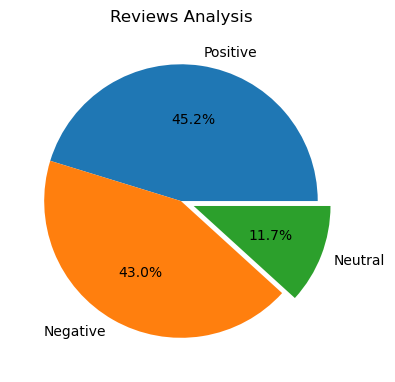

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.1), autopct='%1.1f%%')

***

# Task 2

## Predicting customer buying behaviour

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
import chardet

with open('customer_booking.csv', 'rb') as rawdata:
  result = chardet.detect(rawdata.read(100000))

print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [131]:
df= pd.read_csv('customer_booking.csv', encoding='ISO-8859-1')
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


## Exploratory Data Analysis

In [132]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [133]:
df.shape

(50000, 14)

In [134]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

df.booking_complete.value_counts()

## Preprocessing

Les trois méthodes - factorize(), LabelEncoder et l'encodage one-hot - sont toutes utilisées pour convertir des données catégorielles en valeurs numériques, mais elles le font de manière légèrement différente. Voici les différences clés entre ces trois méthodes :

factorize() :

Cette méthode est fournie par Pandas et attribue un entier unique à chaque catégorie dans une colonne catégorielle.
Elle renvoie une série de valeurs entières représentant les catégories, ainsi qu'un index supplémentaire.
Elle est simple et rapide, mais elle ne génère pas de nouvelles colonnes, donc elle peut ne pas être idéale pour les modèles d'apprentissage automatique qui nécessitent des variables indicatrices.
Elle est utile'on aus avez besoin d'une représentation numérique simple des catég ies et des exigencesies et des exigences

Encodage one-hot :

Cette méthode crée de nouvelles colonnes binaires pour chaque catégorie unique dans une colonne catégorielle.
Chaque observation est représentée par un vecteur binaire, avec une colonne correspondant à chaque catégorie unique.
Elle est utile lorsque les catégories n'ont pas de relation ordonnée et que le modèle peut bénéficier d'une représentation binaire de ces catégories.
Elle génère des variables indicatrices, ce qui peut augmenter la dimensionnalité des données mais permet de capturer efficacement les relations entre les catégories.


LabelEncoder :

Cette méthode est fournie par Scikit-learn et fonctionne de manière similaire à factorize(), mais elle est plus flexible.
Elle attribue également un entier unique à chaque catégorie, mais elle est capable de gérer des scénarios plus complexes, comme les catégories manquantes ou inconnues.
Elle ne génère pas de nouvelles colonnes non plus, donc elle ne convient pas non plus aux modèles nécessitant des variables indicatrices.
Elle est utile lorsque vous avez besoin d'une représentation numérique des catégories avec plus de fonctionnalités que factorize().  
En résumé, le choix entre ces méthodes dépend du contexte spécifique de l'ensemble de données, de la nature des catégories et des exigences

In [135]:

X= df.drop('booking_complete',axis=1)
y= df.booking_complete         

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [136]:
"""
from sklearn.preprocessing import LabelEncoder

# Création d'un objet LabelEncoder
label_encoder = LabelEncoder()

# Boucle sur chaque colonne de X avec un type de données "object"
for colname in X.select_dtypes("object"):
    # Conversion des valeurs catégorielles en valeurs numériques
    X[colname] = label_encoder.fit_transfo"""
print(X)


       num_passengers  sales_channel  trip_type  purchase_lead  \
0                   2              0          0            262   
1                   1              0          0            112   
2                   2              0          0            243   
3                   1              0          0             96   
4                   2              0          0             68   
...               ...            ...        ...            ...   
49995               2              0          0             27   
49996               1              0          0            111   
49997               1              0          0             24   
49998               1              0          0             15   
49999               1              0          0             19   

       length_of_stay  flight_hour  flight_day  route  booking_origin  \
0                  19            7           0      0               0   
1                  20            3           0      0        

In [137]:
X.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [138]:
X

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,0,0,262,19,7,0,0,0,1,0,0,5.52
1,1,0,0,112,20,3,0,0,0,0,0,0,5.52
2,2,0,0,243,22,17,1,0,1,1,1,0,5.52
3,1,0,0,96,31,4,0,0,0,0,0,1,5.52
4,2,0,0,68,22,15,1,0,1,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,0,27,6,9,0,638,36,1,0,1,5.62
49996,1,0,0,111,6,4,4,638,36,0,0,0,5.62
49997,1,0,0,24,6,22,0,638,36,0,0,1,5.62
49998,1,0,0,15,6,11,3,638,36,1,0,1,5.62


***

In [139]:

from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

route                    0.054272
booking_origin           0.046527
flight_duration          0.018522
wants_extra_baggage      0.008879
length_of_stay           0.006903
wants_preferred_seat     0.004782
wants_in_flight_meals    0.002703
purchase_lead            0.002205
num_passengers           0.001343
sales_channel            0.000723
trip_type                0.000180
flight_hour              0.000000
flight_day               0.000000
Name: MI Scores, dtype: float64

Scores d'information mutuelle (MI) :

Les scores d'information mutuelle mesurent la dépendance entre deux variables en mesurant la quantité d'information que la présence d'une variable apporte sur l'autre.
Dans le contexte de la sélection de fonctionnalités, les scores MI sont utilisés pour évaluer l'importance ou la pertinence de chaque fonctionnalité par rapport à la variable cible.
Les scores MI sont généralement calculés pour chaque fonctionnalité par rapport à la variable cible, et les fonctionnalités avec des scores plus élevés sont considérées comme plus informatives pour la prédiction de la variable cibifférents.

Cartes thermiques (heatmaps) :

Les cartes thermiques sont des représentations visuelles des données où les valeurs dans une matrice sont représentées par des couleurs pour montrer des tendances ou des motifs.
Dans le contexte de la corrélation entre les fonctionnalités, une carte thermique peut être utilisée pour visualiser la corrélation entre chaque paire de fonctionnalités dans un ensemble de données.
Les cartes thermiques sont souvent utilisées pour identifier les relations linéaires ou non linéaires entre les fonctionnalités, ce qui peut être utile pour comprendre la structure des données et pour sélectionner des fonctionnalités corrélées.
En résumé, les scores d'information mutuelle sont utilisés pour évaluer l'importance des fonctionnalités par rapport à la variable cible, tandis que les cartes thermiques sont utilisées pour visualiser la corrélation entre les fonctionnalités elles-mêmes. Bien qu'elles soient toutes deux des outils utiles dans l'analyse des données, elles ont des objectifs différents.

***

Importance :

L'importance d'une caractéristique se réfère à son pouvoir prédictif ou informatif par rapport à la variable cible dans un modèle d'apprentissage automatique.
Lor'onous parlons de l'importance des caractéristiqueon s'us intéreons à la capacité de chaque caractéristique à expliquer ou à prédire la variable cible.
Les scores d'importance des caractéristiques peuvent être calculés à l'aide de différentes méthodes, telles que l'information mutuelle, les coefficients de régression, les importances d'arbre de décision, eles-mêmes.

Corrélation :

La corrélation mesure la relation linéaire entre deux variables.
Lorsqu'on parle de la corrélation entre les caractéristiques, on regarde comment les valeurs de deux caractéristiques varient ensemble. Une corrélation positive signifie que les valeurs des deux caractéristiques augmentent ou diminuent ensemble, tandis qu'une corrélation négative signifie que les valeurs d'une caractéristique augmentent alors que les valeurs de l'autre diminuent.
La corrélation est souvent utilisée pour identifier les relations entre les caractéristiques dans un ensemble de données. Une forte corrélation entre deux caractéristiques peut indiquer qu'elles capturent des informations similaires ou redondantes.
En résumé, bien que l'importance des caractéristiques et la corrélation entre les caractéristiques soient toutes deux importantes dans l'analyse des données, elles représentent des aspects différents des données. L'importance des caractéristiques se concentre sur la capacité de prédiction des caractéristiques par rapport à la variable cible, tandis que la corrélation entre les caractéristiques examine les relations linéaires entre les caractéristiques elles-mêmes.

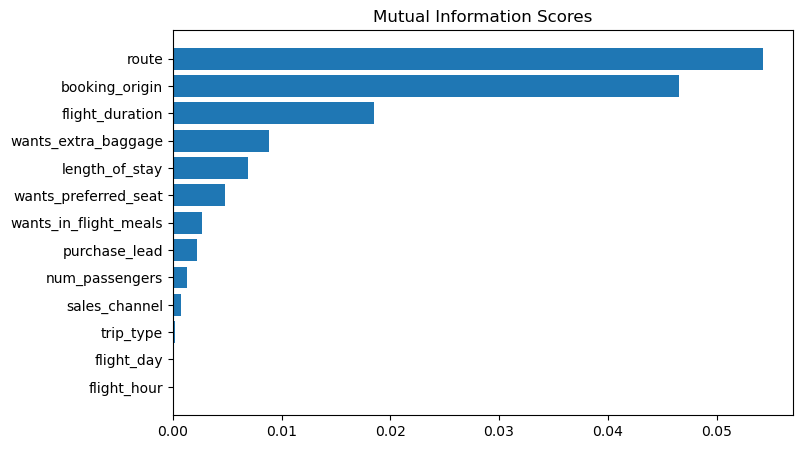

In [140]:

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)
     

In [149]:
from sklearn.model_selection import train_test_split

def dataset(X, y):
    # Diviser les données en ensembles de formation et de test (80/20)
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)
    
    # Diviser l'ensemble de formation en ensembles de formation et de validation (75/25 des données d'entraînement)
    train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.25, random_state=0)
    
    return train_X, val_X, test_X, train_y, val_y, test_y


In [150]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

MinMaxScaler est une technique de mise à l'échelle des fonctionnalités utilisée dans le prétraitement des données. Il transforme chaque caractéristique individuellement en les mettant à l'échelle dans une plage spécifiée (par défaut, entre 0 et 1)

## Model 1 : Random forest classifier with top 6 features

In [151]:
# Assignation des fonctionnalités dans une liste
features = ['route', 'booking_origin', 'flight_duration', 'wants_extra_baggage', 'length_of_stay', 'num_passengers']

# Sélection des fonctionnalités et encodage one-hot
X = df[features]
X = pd.get_dummies(X, columns=features)
X = scale(X)

# Définition de la cible
y = df.booking_complete       

# Division des données en ensembles d'entraînement, de validation et de test
X_train, X_val, X_test, y_train, y_val, y_test = dataset(X, y)

# Initialisation et entraînement du modèle RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de validation
preds = forest_model.predict(X_val)

# Calcul et affichage de l'exactitude et du score AUC
print('ACCURACY: ', accuracy_score(y_val, preds) * 100)
print('AUC score: ', roc_auc_score(y_val, preds))

ACCURACY:  83.15
AUC score:  0.562921307669621


## Model 2 : Random forest classifier with all features

In [152]:

# Sélection des fonctionnalités et encodage one-hot
X = df.drop('booking_complete', axis=1)
X = pd.get_dummies(X)
X = scale(X)

# Définition de la cible
y = df.booking_complete       

# Division des données en ensembles d'entraînement, de validation et de test
X_train, X_val, X_test, y_train, y_val, y_test = dataset(X, y)

# Initialisation et entraînement du modèle RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de validation
preds = forest_model.predict(X_val)

# Calcul et affichage de l'exactitude et du score AUC
print('ACCURACY: ', accuracy_score(y_val, preds) * 100)
print('AUC score: ', roc_auc_score(y_val, preds))

ACCURACY:  84.71
AUC score:  0.5459970036358806


## Model 3 : XGB classifier with top 6 features

In [145]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [153]:
# Sélection des fonctionnalités et encodage one-hot
features = ['route', 'booking_origin', 'flight_duration', 'wants_extra_baggage', 'length_of_stay', 'num_passengers']
X = df[features]
X = pd.get_dummies(X, columns=features)
X = scale(X)

# Définition de la cible
y = df.booking_complete

# Division des données en ensembles d'entraînement, de validation et de test
X_train, X_val, X_test, y_train, y_val, y_test = dataset(X, y)

# Initialisation et entraînement du modèle XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de validation
prediction_xgb = xgb_model.predict(X_val)

# Calcul et affichage de l'exactitude et du score AUC
print('ACCURACY: ', accuracy_score(y_val, prediction_xgb) * 100)
print('AUC score: ', roc_auc_score(y_val, prediction_xgb))

ACCURACY:  84.99
AUC score:  0.522893565925117


## Model 4 : XGB classifier with all features

In [154]:
# Sélection des fonctionnalités
X = df.drop('booking_complete', axis=1)

# Encodage one-hot
X = pd.get_dummies(X)

# Mise à l'échelle
X = scale(X)

# Définition de la cible
y = df.booking_complete

# Division des données en ensembles d'entraînement, de validation et de test
X_train, X_val, X_test, y_train, y_val, y_test = dataset(X, y)

# Initialisation et entraînement du modèle XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de validation
prediction_xgb = xgb_model.predict(X_val)

# Calcul et affichage de l'exactitude et du score AUC
print('ACCURACY: ', accuracy_score(y_val, prediction_xgb) * 100)
print('AUC score: ', roc_auc_score(y_val, prediction_xgb))

ACCURACY:  84.85000000000001
AUC score:  0.5411094546070015


### Finalizing xgboost model with all features as final model, as it has goos accuracy and higher AUC score compared to other models

Validating with test data set



In [156]:
# Sélection des fonctionnalités et encodage one-hot
features = ['route', 'booking_origin', 'flight_duration', 'wants_extra_baggage', 'length_of_stay', 'num_passengers']
X = df[features]
X = pd.get_dummies(X, columns=features)
X = scale(X)

# Définition de la cible
y = df.booking_complete

# Division des données en ensembles d'entraînement, de validation et de test
X_train, X_val, X_test, y_train, y_val, y_test = dataset(X, y)

# Initialisation et entraînement du modèle XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de validation
prediction_xgb = xgb_model.predict(X_test)

# Calcul et affichage de l'exactitude et du score AUC
print('ACCURACY: ', accuracy_score(y_test, prediction_xgb) * 100)
print('AUC score: ', roc_auc_score(y_test, prediction_xgb))

ACCURACY:  84.72
AUC score:  0.5189398567740671
